In [7]:
import networkx as nx
from utils.utils import load_config, create_datasets, pre_processing
import matplotlib.pyplot as plt

In [8]:
config = load_config(config_path='./configs/config_kuramoto.yml')


G = nx.complete_graph(10)
# G = nx.grid_2d_graph(7, 10)
train_data, t_train, _,_,_,_ = create_datasets(config=config, graph=G)

train_data = pre_processing(train_data)

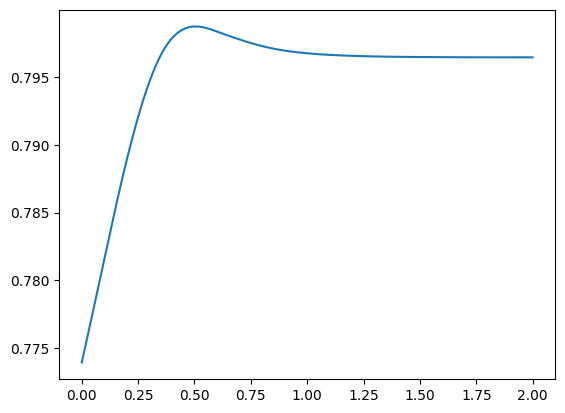

In [9]:
train_data = train_data.cpu().detach().numpy()
t_train = t_train.cpu().detach().numpy()

plt.plot(t_train, train_data[:, 0, :])

In [10]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import torch_geometric
import numpy as np

In [11]:
def animation(graphs, pos, G, vmin=-15, vmax=15, steps=30):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    sm = ScalarMappable(cmap=plt.cm.plasma, norm=Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])  # Required for ScalarMappable to work
    
    # pos = nx.circular_layout(G)
    # pos = [(n%w, n ) for n in range(G.number_of_nodes())]
    plt.colorbar(sm, ax=ax)  # Associate colorbar with the graph's axis
    
    def visualize_graphs(frame):
        # ax.clear()
        graph = graphs[frame]
        # Convert the graph to a NetworkX graph
        
        # Get node colors based on graph.x values
        node_colors = np.array([graph[node][0] for node in range(G.number_of_nodes())])
        
        # Draw the graph with node colors
        nx.draw(G, pos, node_color=node_colors, with_labels=False, cmap=plt.cm.plasma, node_size=200, 
                font_color='black', vmin=vmin, vmax=vmax, ax=ax)
        
        # plt.show()
    anim = FuncAnimation(fig, visualize_graphs, np.arange(0, len(graphs), steps), interval = 1000/30)
    return anim

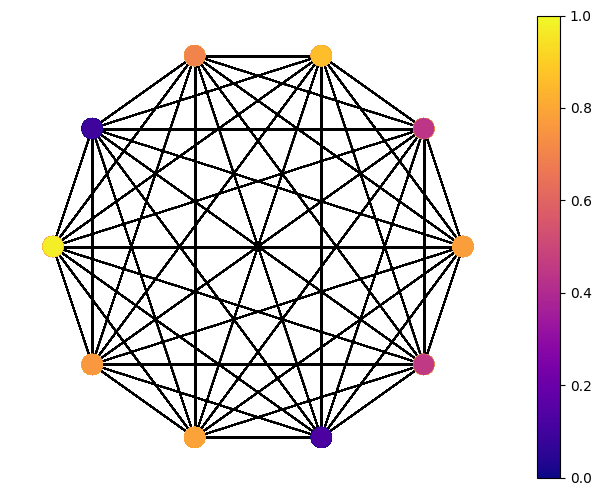

In [12]:
# pos = {n: (i % 10, i) for i,n in enumerate(G.nodes())}
pos = nx.circular_layout(G)

anim = animation(train_data, steps=3, vmin=0, vmax=1, pos=pos, G=G)
html_anim = anim.to_jshtml()
HTML(html_anim)